## 数据探索与可视化

### 实验目标
- 学习并掌握如何使用Python进行数据探索与可视化。
- 理解并应用数据探索的基本方法，包括数据清洗、格式化和描述性统计分析。
- 使用Matplotlib和Seaborn等可视化工具，绘制不同类型的图表，分析数据分布及特征之间的关系。
- 利用pandas_profiling生成数据的交互式报告，全面了解数据的分布、缺失值和异常值。

### 实验要求

1. 使用pandas读取数据集github_bot_processed_data.csv。探索pandas的显示选项，以便查看更多数据行和列。
2. 使用head()方法查看数据的前几行，并使用info()方法查看每列的数据类型，观察两者的区别。
使用describe()方法生成数据的描述性统计信息。
3. 对数据进行格式化处理，并展示不同格式（例如，日期、货币、百分比等）的效果。
4. 对public_repos、public_gists、followers、following等列进行对数变换，并查看其影响。
5. 使用Matplotlib绘制图表
    - 绘制条形图：展示label列的类别分布。
    - 绘制堆积柱状图：展示多个布尔特征（如site_admin、company等）的分布。
    - 绘制直方图：展示log_public_repos的对数变换后的数据分布。
    - 绘制散点图：展示public_repos与followers之间的关系。
    - 绘制散点矩阵：展示多个数值型特征之间的成对关系。
6. 使用Seaborn绘制图表
    - 绘制箱线图：展示不同label类别下log_followers的分布。
    - 绘制成对图：展示不同特征之间的成对关系，并根据label分类。
    - 绘制热图：展示log_public_repos、log_public_gists、log_followers和log_following等特征之间的相关性。
    - 绘制小提琴图：展示label与log_followers之间的分布差异。
7. 使用pandas_profiling.ProfileReport()生成交互式数据分析报告，分析数据的统计分布、缺失值、异常值等。

In [2]:
import pandas as pd

# 读取数据
data = pd.read_csv("/Users/caolu/Desktop/github_bot_processed_data.csv")

# 查看数据的基本信息
print(data.head())  # 查看前5行


   label  type  site_admin  company   blog  location  hireable  \
0  Human  True       False    False  False     False     False   
1  Human  True       False    False   True     False      True   
2  Human  True       False     True   True      True      True   
3    Bot  True       False    False  False      True     False   
4  Human  True       False    False  False     False      True   

                                                 bio  public_repos  \
0                                                NaN            26   
1  I just press the buttons randomly, and the pro...            30   
2         Time is unimportant,\nonly life important.           103   
3                                                NaN            49   
4                                                NaN            11   

   public_gists  followers  following                 created_at  \
0             1          5          1  2011-09-26 17:27:03+00:00   
1             3          9          6  2015-06

In [3]:
# 设置显示更多行和列
pd.set_option('display.max_rows', 100)  # 设置最大显示行数
pd.set_option('display.max_columns', 50)  # 设置最大显示列数

# 可选：设置列宽，方便查看较长文本
pd.set_option('display.max_colwidth', 100)

# 可选：显示所有数据不换行
pd.set_option('display.expand_frame_repr', False)
print(data)


       label  type  site_admin  company   blog  location  hireable                                                                                                  bio  public_repos  public_gists  followers  following                 created_at                 updated_at  text_bot_count
0      Human  True       False    False  False     False     False                                                                                                  NaN            26             1          5          1  2011-09-26 17:27:03+00:00  2023-10-13 11:21:10+00:00               0
1      Human  True       False    False   True     False      True                                        I just press the buttons randomly, and the program evolves...            30             3          9          6  2015-06-29 10:12:46+00:00  2023-10-07 06:26:14+00:00               0
2      Human  True       False     True   True      True      True                                                           Time is uni

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19768 entries, 0 to 19767
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   label           19768 non-null  object
 1   type            19768 non-null  bool  
 2   site_admin      19768 non-null  bool  
 3   company         19768 non-null  bool  
 4   blog            19768 non-null  bool  
 5   location        19768 non-null  bool  
 6   hireable        19768 non-null  bool  
 7   bio             8839 non-null   object
 8   public_repos    19768 non-null  int64 
 9   public_gists    19768 non-null  int64 
 10  followers       19768 non-null  int64 
 11  following       19768 non-null  int64 
 12  created_at      19768 non-null  object
 13  updated_at      19768 non-null  object
 14  text_bot_count  19768 non-null  int64 
dtypes: bool(6), int64(5), object(4)
memory usage: 1.5+ MB


In [5]:
full_summary = data.describe(include='all')
print("\n所有类型数据的描述性统计信息：")
print(full_summary)


所有类型数据的描述性统计信息：
        label   type site_admin company   blog location hireable                bio  public_repos  public_gists     followers     following                 created_at                 updated_at  text_bot_count
count   19768  19768      19768   19768  19768    19768    19768               8839  19768.000000  19768.000000  19768.000000  19768.000000                      19768                      19768    19768.000000
unique      2      2          2       2      2        2        2               8641           NaN           NaN           NaN           NaN                      19767                      19633             NaN
top     Human   True      False    True  False     True    False  Software Engineer           NaN           NaN           NaN           NaN  2009-07-15 13:20:42+00:00  2023-10-11 11:21:04+00:00             NaN
freq    18578  19597      19678   10794  11256    12691    16470                 77           NaN           NaN           NaN           NaN    

In [6]:
data['created_at'] = pd.to_datetime(data['created_at'])  # 转换为日期时间格式
data['formatted_date'] = data['created_at'].dt.strftime('%Y-%m-%d')  # 格式化为 YYYY-MM-DD
print("日期格式化示例：")
print(data[['created_at', 'formatted_date']].head())

日期格式化示例：
                 created_at formatted_date
0 2011-09-26 17:27:03+00:00     2011-09-26
1 2015-06-29 10:12:46+00:00     2015-06-29
2 2008-08-29 16:20:03+00:00     2008-08-29
3 2014-05-20 18:43:09+00:00     2014-05-20
4 2012-08-16 14:19:13+00:00     2012-08-16


In [7]:
import numpy as np
log_columns = ['public_repos', 'public_gists', 'followers', 'following']
for col in log_columns:
    data[f'log_{col}'] = np.log1p(data[col]) 
print(data)

       label  type  site_admin  company   blog  location  hireable                                                                                                  bio  public_repos  public_gists  followers  following                created_at                 updated_at  text_bot_count formatted_date  log_public_repos  log_public_gists  log_followers  log_following
0      Human  True       False    False  False     False     False                                                                                                  NaN            26             1          5          1 2011-09-26 17:27:03+00:00  2023-10-13 11:21:10+00:00               0     2011-09-26          3.295837          0.693147       1.791759       0.693147
1      Human  True       False    False   True     False      True                                        I just press the buttons randomly, and the program evolves...            30             3          9          6 2015-06-29 10:12:46+00:00  2023-10-07 06:26:14

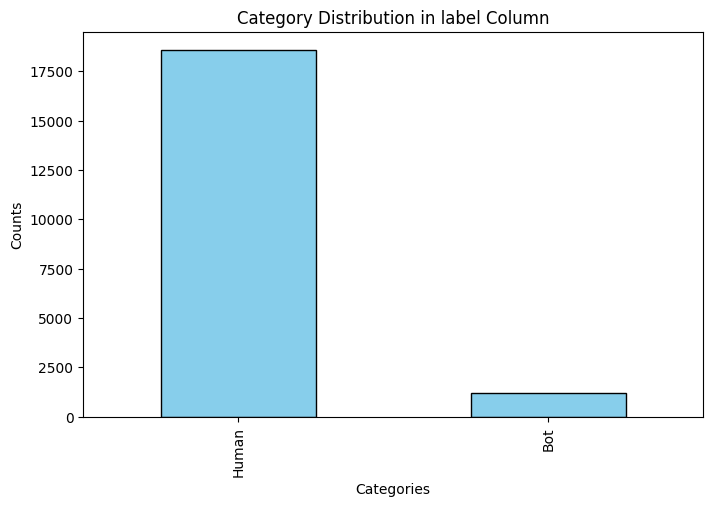

In [8]:
import matplotlib.pyplot as plt
label_counts = data['label'].value_counts()
plt.figure(figsize=(8, 5))
label_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Category Distribution in label Column')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.show()

/var/folders/xs/9bqlm9cd7h7bsby1sbtnr7400000gn/T/ipykernel_37529/3989228746.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  bool_counts = data[bool_features].apply(pd.value_counts).T


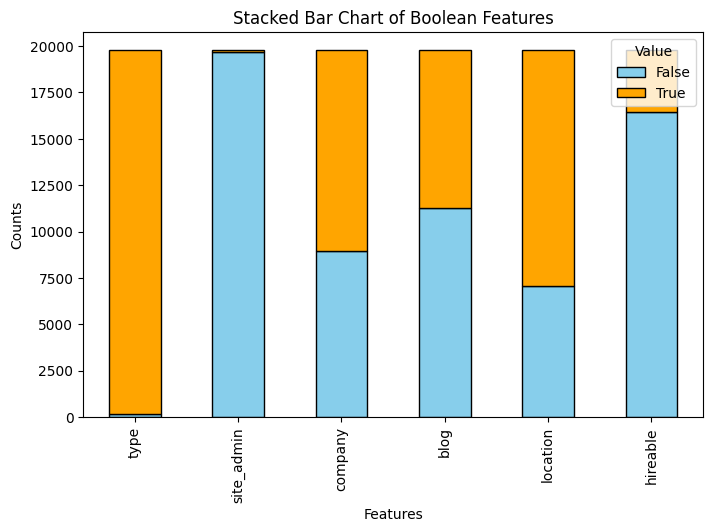

In [9]:
bool_features = ['type', 'site_admin', 'company', 'blog', 'location', 'hireable']
bool_counts = data[bool_features].apply(pd.value_counts).T
bool_counts.plot(kind='bar', stacked=True, figsize=(8, 5), color=['skyblue', 'orange'], edgecolor='black')
plt.title('Stacked Bar Chart of Boolean Features')
plt.xlabel('Features')
plt.ylabel('Counts')
plt.legend(title='Value', labels=['False', 'True'])
plt.show()

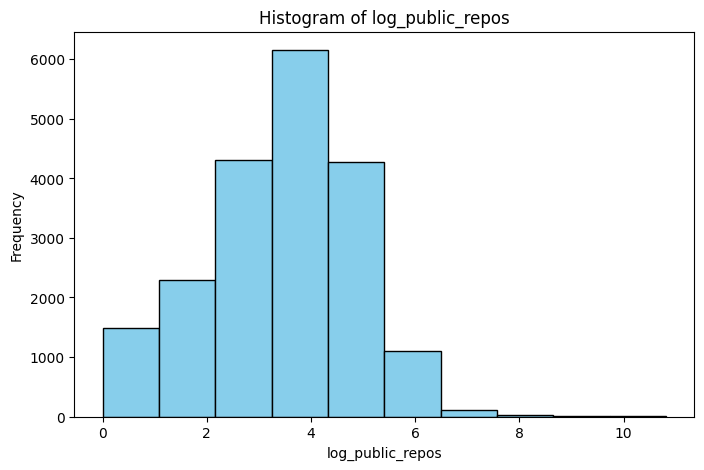

In [10]:
plt.figure(figsize=(8, 5))
data['log_public_repos'].plot(kind='hist', bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of log_public_repos')
plt.xlabel('log_public_repos')
plt.ylabel('Frequency')
plt.show()

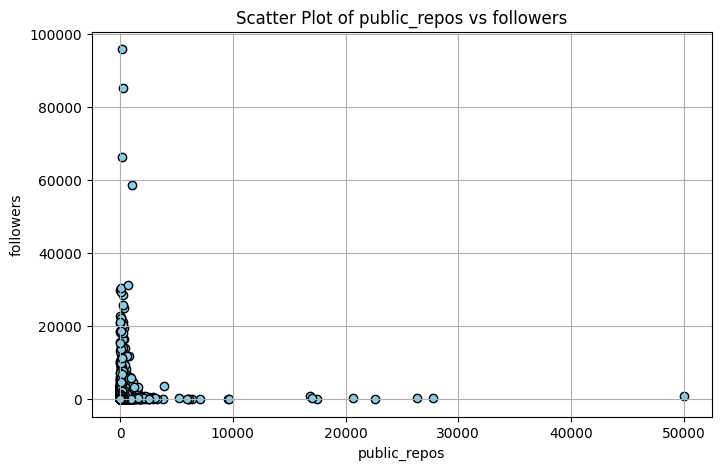

In [11]:
plt.figure(figsize=(8, 5))
plt.scatter(data['public_repos'], data['followers'], color='skyblue', edgecolor='black')
plt.title('Scatter Plot of public_repos vs followers')
plt.xlabel('public_repos')
plt.ylabel('followers')
plt.grid(True)
plt.show()

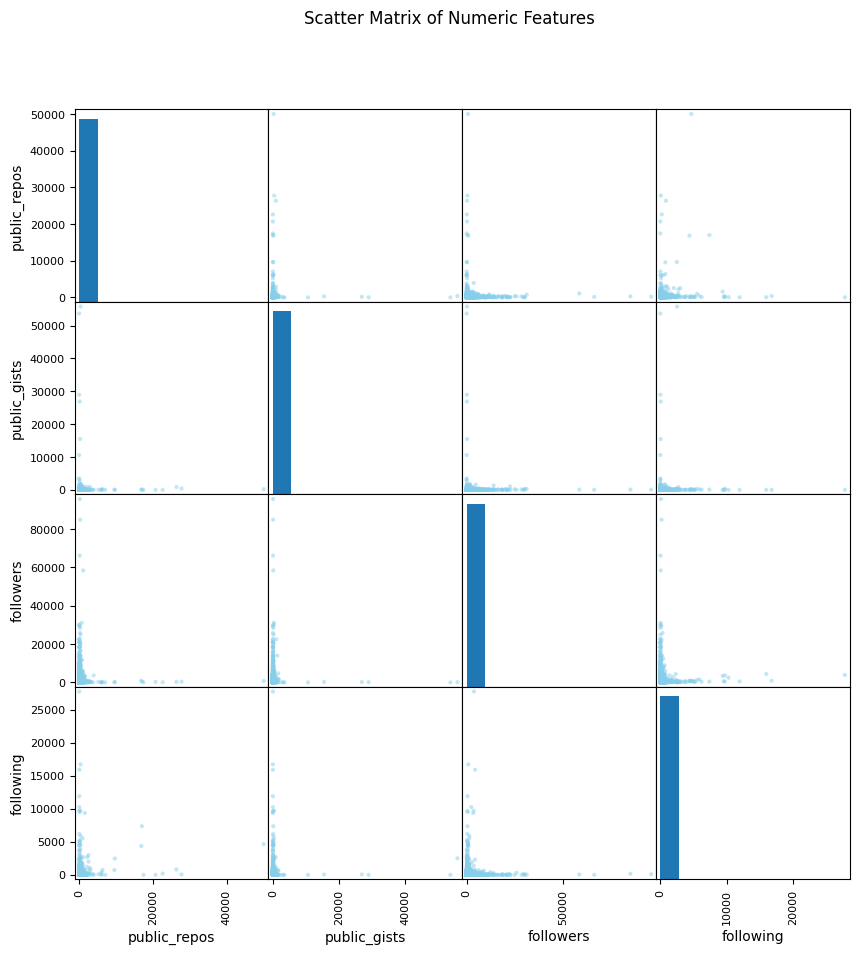

In [12]:
from pandas.plotting import scatter_matrix

# 选择数值型特征
numeric_features = ['public_repos', 'public_gists', 'followers', 'following']

# 绘制散点矩阵，确保不使用冲突的参数
scatter_matrix(data[numeric_features], figsize=(10, 10), diagonal='hist', color='skyblue')

plt.suptitle('Scatter Matrix of Numeric Features')
plt.show()


/var/folders/xs/9bqlm9cd7h7bsby1sbtnr7400000gn/T/ipykernel_37529/3910968739.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='label', y='log_followers', palette='Set2')


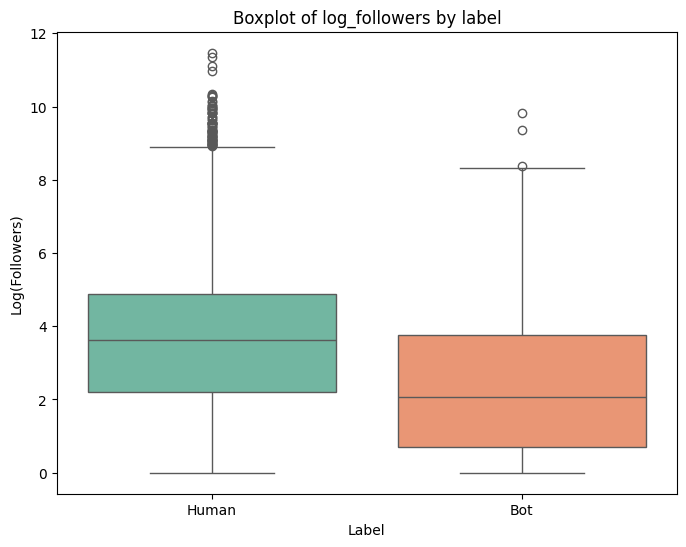

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='label', y='log_followers', palette='Set2')
plt.title('Boxplot of log_followers by label')
plt.xlabel('Label')
plt.ylabel('Log(Followers)')
plt.show()

In [ ]:
pairplot_features = ['log_public_repos', 'log_public_gists', 'log_followers', 'log_following', 'label']
sns.pairplot(data[pairplot_features], hue='label', palette='husl', diag_kind='kde')
plt.suptitle('Pairplot of Features by Label', y=1.02)
plt.show()

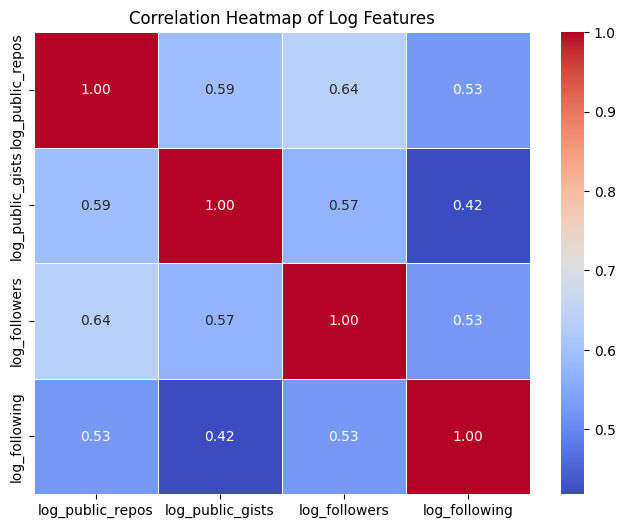

In [ ]:
correlation_matrix = data[['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Log Features')
plt.show()

/var/folders/xs/9bqlm9cd7h7bsby1sbtnr7400000gn/T/ipykernel_22512/1562969512.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='label', y='log_followers', palette='muted', split=True)


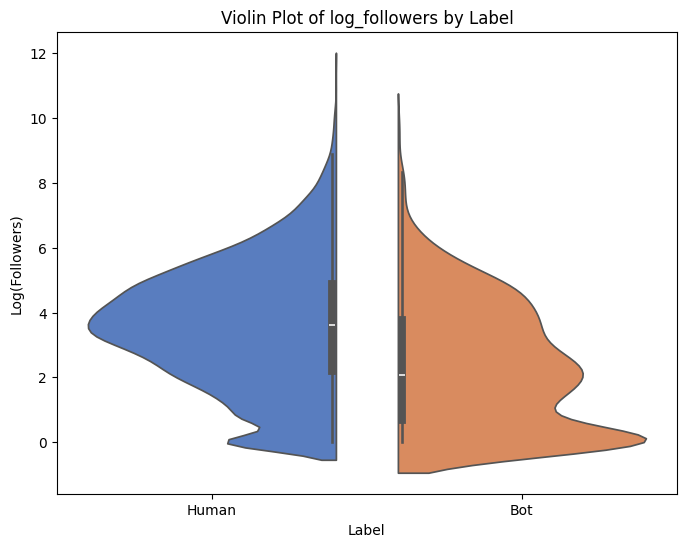

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=data, x='label', y='log_followers', palette='muted', split=True)
plt.title('Violin Plot of log_followers by Label')
plt.xlabel('Label')
plt.ylabel('Log(Followers)')
plt.show()

In [ ]:
pip list | grep "pandas-profiling\|pydantic"


pandas-profiling          3.2.0
pydantic                  1.10.19

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip3 uninstall pandas-profiling pydantic pydantic_core -y
!pip3 install pandas-profiling==3.2.0 "pydantic<2.0"


Found existing installation: pandas-profiling 3.2.0
Uninstalling pandas-profiling-3.2.0:
  Successfully uninstalled pandas-profiling-3.2.0
Found existing installation: pydantic 1.10.19
Uninstalling pydantic-1.10.19:
  Successfully uninstalled pydantic-1.10.19
Found existing installation: pydantic_core 2.27.1
Uninstalling pydantic_core-2.27.1:
  Successfully uninstalled pydantic_core-2.27.1
  Using cached pandas_profiling-3.2.0-py2.py3-none-any.whl.metadata (21 kB)
  Using cached pydantic-1.10.19-cp312-cp312-macosx_11_0_arm64.whl.metadata (152 kB)
Using cached pandas_profiling-3.2.0-py2.py3-none-any.whl (262 kB)
Using cached pydantic-1.10.19-cp312-cp312-macosx_11_0_arm64.whl (2.2 MB)

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip


In [6]:
# 导入 pandas_profiling 并生成交互式报告
from pandas_profiling import ProfileReport

# 生成数据报告
profile = ProfileReport(data, title="Interactive Data Analysis Report", explorative=True)

# 保存报告为HTML文件
report_path = "github_bot_data_analysis_report.html"
profile.to_file(report_path)

report_path

ModuleNotFoundError: No module named 'distutils'